Gui Registry
============

`fiatlight.fiat_togui` is the central module that is able to associate a GUI with a type.

It uses sophisticated mechanisms to inspect the type of function parameters and return values.

It handles a registry of types and their associated GUIs, to which you can add your own types, by calling`
fiatlight.register_type(DataType, DataTypeWithGui)`, where `DataType` is the type you want to register, and `DataTypeWithGui` is the class that will handle the GUI for this type.

`DataTypeWithGui` must inherit from `AnyDataWithGui` and implement the necessary callbacks.

Explore the registry
=====================

The `fiatlight` command line utility is a powerful tool that allows you to explore the available widgets and types in Fiatlight. It can be used to list the available types, to print the GUI info for a given type, and to run a GUI demo for a given type.

Here is the help message for the `fiatlight` command line utility:

In [16]:
%%bash
fiatlight --help

INFO: Showing help with the command 'fiatlight -- --help'.

NAME
    fiatlight

SYNOPSIS
    fiatlight COMMAND

COMMANDS
    COMMAND is one of the following:

     types
       List registered types, with a possible query to filter them. Add an optional query to filter the types.

     gui
       Print the info and fiat attributes available for a given type. Add the datatype or Gui type name as an argument (if not provided, all Gui widgets names are printed)

     fn_attrs
       Display the available fiat attributes for a function


See the page [Tutorials/fiatlight command line utility](manual_cli.ipynb) for more information.

Primitive types
================

The primitive types `int`, `float`, `str`, `bool` are registered by default.

Basic example
-------------

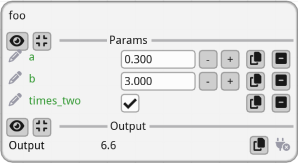

In [17]:
import fiatlight as fl
def foo(a: float, b: float = 3.0, times_two: bool = False) -> float:
    return (a + b) * (2 if times_two else 1)

# Run an app that displays the GUI for the function
# where the user can input the values of the parameters
# (or use the default values)
fl.run(foo, app_name="Primitive Basic")

Example with custom GUI options
-------------------------------

The GUI of primitive is extensively configurable via fiat attributes.

See [FunctionWithGui](api_function_with_gui) for a comprehensive list of all the available attributes (in the "Customizing parameters GUI" section).

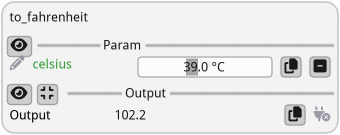

In [18]:
import fiatlight as fl


@fl.with_fiat_attributes(celsius__range=(0, 100), celsius__format="%.1f °C")
def to_fahrenheit(celsius: float) -> float:
    return celsius * 9 / 5 + 32


fl.run(to_fahrenheit, app_name="Primitive Custom")

Range limited numeric types
----------------------------

As a convenience, Fiatlight includes those predefined types for which the GUI will take into account their boundings.

In [19]:
from typing import NewType

# Float types with specific ranges (bounds included)
Float_0_1 = NewType("Float_0_1", float)  # 0 to 1
Float_0_1.__doc__ = "synonym for float in [0, 1] (NewType)"

Float__1_1 = NewType("Float__1_1", float)  # -1 to 1
Float__1_1.__doc__ = "synonym for float in [-1, 1] (NewType)"

PositiveFloat = NewType("PositiveFloat", float)  # Any positive float ( strictly greater than 0)
PositiveFloat.__doc__ = "synonym for float > 0 (strictly greater than 0) (NewType)"

# Int types with specific ranges (bounds included)
Int_0_255 = NewType("Int_0_255", int)  # 0 to 255
Int_0_255.__doc__ = "synonym for int in [0, 255] (NewType)"

File name types
===============

Several file types names are registered by default. They are synonyms for `str` and are used to specify file paths.
They will be presented with a file dialog in the GUI.

In [20]:
from fiatlight.fiat_notebook import look_at_code
%look_at_python_code fiatlight.fiat_types.file_types

from typing import NewType


# FilePath is a synonym of str, but when used as a function parameter,
# it will be displayed as a widget where you can select a file.
FilePath = NewType("FilePath", str)
FilePath.__doc__ = "synonym for str, describing a file path (NewType)"
# FilePath_Save is a synonym of str, but when used as a function parameter,
# it will be displayed as a widget where you can select a file to save to.
FilePath_Save = NewType("FilePath_Save", str)
FilePath_Save.__doc__ = "synonym for str, describing a file path for saving (NewType)"

# With ImagePath, you can select an image file.
ImagePath = NewType("ImagePath", FilePath)
ImagePath.__doc__ = "synonym for str, describing an image file path (NewType)"
ImagePath_Save = NewType("ImagePath_Save", FilePath_Save)
ImagePath_Save.__doc__ = "synonym for str, describing an image file path for saving (NewType)"

# With TextPath, you can select a text file.
TextPath = NewType("TextPath", FilePath)
TextPath.__doc__ = "synonym for str, describing a text file path (NewType)"
TextPath_Save = NewType("TextPath_Save", FilePath_Save)
TextPath_Save.__doc__ = "synonym for str, describing a text file path for saving (NewType)"

# With AudioPath, you can select an audio file.
AudioPath = NewType("AudioPath", FilePath)
AudioPath.__doc__ = "synonym for str, describing an audio file path (NewType)"
AudioPath_Save = NewType("AudioPath_Save", FilePath_Save)
AudioPath_Save.__doc__ = "synonym for str, describing an audio file path for saving (NewType)"

# With VideoPath, you can select a video file.
VideoPath = NewType("VideoPath", FilePath)
VideoPath.__doc__ = "synonym for str, describing a video file path (NewType)"
VideoPath_Save = NewType("VideoPath_Save", FilePath_Save)
VideoPath_Save.__doc__ = "synonym for str, describing a video file path for saving (NewType)"

*Example: a pipeline that lets the user select a text file and saves it into another file in lowercase*

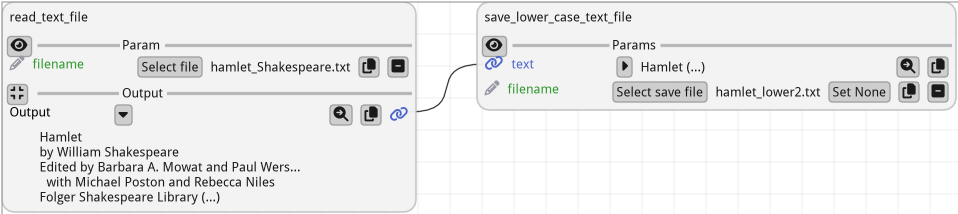

In [21]:
import fiatlight as fl
from fiatlight.fiat_types import TextPath, TextPath_Save

def read_text_file(filename: TextPath) -> str:
    with open(filename) as  f:
        return f.read()

def save_lower_case_text_file(text: str, filename: TextPath_Save | None = None) -> None:
    # since filename is optional, the file will be saved only if the user selects a filename
    if filename is None:
        return
    with open(filename, "w") as f:
        f.write(text.lower())

Color types
===========

Several color types are registered by default.

In [22]:
%look_at_python_code fiatlight.fiat_types.color_types

from typing import NewType

ColorRgb = NewType("ColorRgb", tuple[int, int, int])
ColorRgb.__doc__ = "synonym for tuple[int, int, int] describing an RGB color, with values in [0, 255] (NewType)"

ColorRgba = NewType("ColorRgba", tuple[int, int, int, int])
ColorRgba.__doc__ = "synonym for tuple[int, int, int, int] describing an RGBA color, with values in [0, 255] (NewType)"

ColorRgbFloat = NewType("ColorRgbFloat", tuple[float, float, float])
ColorRgbFloat.__doc__ = (
    "synonym for tuple[float, float, float] describing an RGB color, with values in [0, 1] (NewType)"
)

ColorRgbaFloat = NewType("ColorRgbaFloat", tuple[float, float, float, float])
ColorRgbaFloat.__doc__ = (
    "synonym for tuple[float, float, float, float] describing an RGBA color, with values in [0, 1] (NewType)"
)


def _int255_to_float(value: int) -> float:
    return value / 255.0


def _float_to_int255(value: float) -> int:
    return int(value * 255)


def color_rgb_to_color_rgb_float(color_rgb: ColorRgb) -> ColorRgbFloat:
    return ColorRgbFloat(tuple(_int255_to_float(value) for value in color_rgb))  # type: ignore


def color_rgba_to_color_rgba_float(color_rgba: ColorRgba) -> ColorRgbaFloat:
    return ColorRgbaFloat(tuple(_int255_to_float(value) for value in color_rgba))  # type: ignore


def color_rgb_float_to_color_rgb(color_rgb_float: ColorRgbFloat) -> ColorRgb:
    return ColorRgb(tuple(_float_to_int255(value) for value in color_rgb_float))  # type: ignore


def color_rgba_float_to_color_rgba(color_rgba_float: ColorRgbaFloat) -> ColorRgba:
    return ColorRgba(tuple(_float_to_int255(value) for value in color_rgba_float))  # type: ignore


def color_rgb_to_color_rgba(color_rgb: ColorRgb) -> ColorRgba:
    return ColorRgba(color_rgb + (255,))


def color_rgb_float_to_color_rgba_float(color_rgb_float: ColorRgbFloat) -> ColorRgbaFloat:
    return ColorRgbaFloat(color_rgb_float + (1.0,))

*Example: using color types in function*

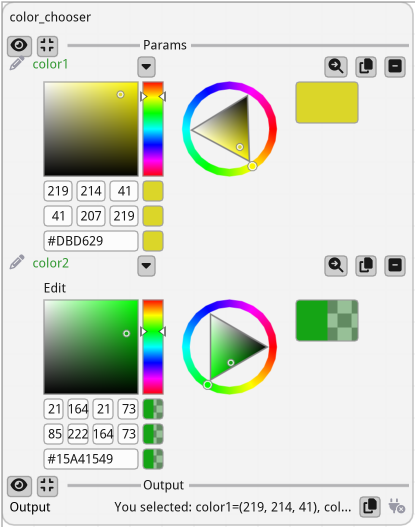

In [23]:
import fiatlight as fl
from fiatlight.fiat_types import ColorRgb, ColorRgba

def color_chooser(color1: ColorRgb, color2: ColorRgba) -> str:
    return f"You selected: {color1=}, {color2=}"

fl.run(color_chooser, app_name="Color Chooser")

Optional types
==============

If a type is registered, its optional version is also registered.

*Example: using an optional color in a function*

(In this example, the user needs to click on "Set" to set a value to the optional color)

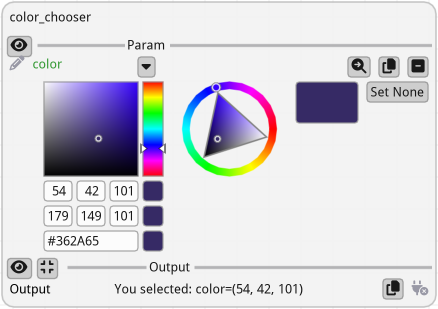

In [24]:
import fiatlight as fl
from fiatlight.fiat_types import ColorRgb, ColorRgba

def color_chooser(color: ColorRgb | None = None) -> str:
    return f"You selected: {color=}"

fl.run(color_chooser, app_name="Optional Color")

Lists
=====

A very basic support is provided for lists. It does not allow to edit the values.
However, it can present a list of values using (all of them will be rendered as string using str() function).

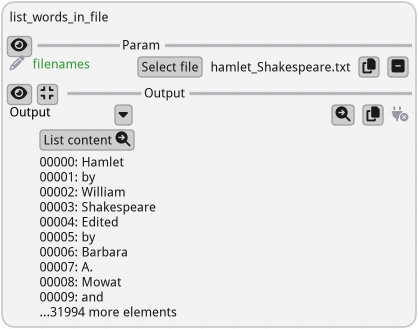

In [25]:
import fiatlight as fl
from fiatlight.fiat_types import TextPath

def list_words_in_file(filenames: TextPath) -> list[str]:
    with open(filenames) as f:
        return f.read().split()

fl.run(list_words_in_file, app_name="List Words in File")

Enum classes
============

Enum classes are automatically associated to a GUI.

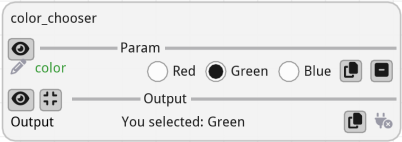

In [26]:
import fiatlight as fl
from enum import Enum

class Color(Enum):
    Red = 1
    Green = 2
    Blue = 3

def color_chooser(color: Color) -> str:
    return f"You selected: {color.name}"

fl.run(color_chooser, app_name="Enum Color")